- Imports

In [ ]:
# Import All Required Liberies
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

- Dataset Work

In [28]:
# Import Dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

# here we can see ouw housing dataset
print("Housing Dataset: ","\n")
print(housing , "\n" , "\n")


# Discription of Dataset
print("Dataset Discription: ","\n")
print(housing.DESCR , "\n" , "\n")


# Features of Dataset
print("Features Of Dataset: " , "\n")
print(housing.feature_names , "\n" , "\n")


# target (label of Dataset) :- y
print("Labels: " , "\n")
print(housing.target , "\n" , "\n")


# Dataset in Matrix Form - Here we perform our all Operation
print("Dataset Matrix" , "\n")
print(housing.data , "\n" , "\n")


Housing Dataset:  

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]], shape=(20640, 8)), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _califo

- Data Preparation

In [ ]:
# Creating DataFrame Using Pandas
dataset = pd.DataFrame(housing.data , columns=housing.feature_names)
dataset


# Add Label(housing.target) in Dataset
dataset["price"] = housing.target
dataset.head()


# data Split into Datapoints and labels
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]




- Split data for training and testing

In [35]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=44)

# idhar ham data split kar rhe hai...for training and for testing

- Data Standerdization

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


- Model Training

In [ ]:
# Import Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

# Normal Regression 
model_regression = LinearRegression() # here we Created Model
model_regression.fit(x_train , y_train)

# Lasso Regression
model_lasso = Lasso()
model_lasso.fit(x_train , y_train)


# Ridge Regression
model_ridge = Ridge()
model_ridge.fit(x_train , y_train)


# Elastic Net Regression
model_elastic_net = ElasticNet()
model_elastic_net.fit(x_train , y_train)




,"alpha alpha: float, default=1.0Constant that multiplies the penalty terms. Defaults to 1.0.See the notes for the exact mathematical meaning of thisparameter. ``alpha = 0`` is equivalent to an ordinary least square,solved by the :class:`LinearRegression` object. For numericalreasons, using ``alpha = 0`` with the ``Lasso`` object is not advised.Given this, you should use the :class:`LinearRegression` object.",1.0
,"l1_ratio l1_ratio: float, default=0.5The ElasticNet mixing parameter, with ``0 <= l1_ratio <= 1``. For``l1_ratio = 0`` the penalty is an L2 penalty. ``For l1_ratio = 1`` itis an L1 penalty. For ``0 < l1_ratio < 1``, the penalty is acombination of L1 and L2.",0.5
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If ``False``, thedata is assumed to be already centered.",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.Check :ref:`an example on how to use a precomputed Gram Matrix in ElasticNet`for details.",False
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


- Model Prediction

In [ ]:
# Normal Regression
y_cap = model_regression.predict(x_test)
print(y_cap)

# Lasso Regression
y_cap_lasso = model_lasso.predict(x_test)
print(y_cap_lasso)

# Ridge Regression
y_cap_ridge = model_ridge.predict(x_test)
print(y_cap_ridge)

# Elastic Net Regression
y_cap_elastic_net = model_elastic_net.predict(x_test)
print(y_cap_elastic_net)

[2.55823281 3.35684836 4.09751962 ... 2.80867915 2.38870762 1.61280809]
[2.0677633 2.0677633 2.0677633 ... 2.0677633 2.0677633 2.0677633]
[2.55805966 3.35658646 4.0975895  ... 2.80868816 2.38863631 1.61282596]
[2.12337531 2.30497493 2.70887472 ... 2.33256835 2.145401   1.88978646]


- Model Evaluation

In [55]:
# Normal Regression
regression_residuals = y_test - y_cap
print(regression_residuals)


# Lasso Regression
lasso_residuals = y_test - y_cap_lasso
print(lasso_residuals)

# Ridge Regression
ridge_residuals = y_test - y_cap_ridge
print(ridge_residuals)

# Elastic Net Regression
elastic_net_residuals = y_test - y_cap_elastic_net
print(elastic_net_residuals)

20127    0.822767
18256    0.715152
10376    0.743480
4109     1.707415
8169    -0.172330
           ...   
2312    -0.014145
18574   -0.691329
14552   -0.313679
1430    -0.606708
4977    -0.554808
Name: price, Length: 4128, dtype: float64
20127    1.313237
18256    2.004237
10376    2.773237
4109     2.932247
8169     0.424237
           ...   
2312    -0.659763
18574   -0.553763
14552    0.427237
1430    -0.285763
4977    -1.009763
Name: price, Length: 4128, dtype: float64
20127    0.822940
18256    0.715414
10376    0.743411
4109     1.707441
8169    -0.172325
           ...   
2312    -0.014418
18574   -0.690954
14552   -0.313688
1430    -0.606636
4977    -0.554826
Name: price, Length: 4128, dtype: float64
20127    1.257625
18256    1.767025
10376    2.132125
4109     2.658891
8169     0.304999
           ...   
2312    -0.662385
18574   -0.419153
14552    0.162432
1430    -0.363401
4977    -0.831786
Name: price, Length: 4128, dtype: float64


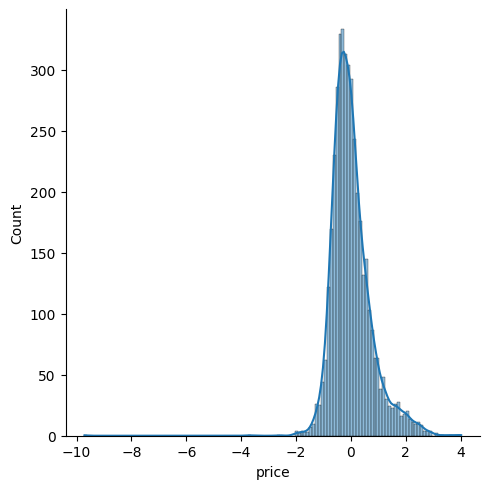

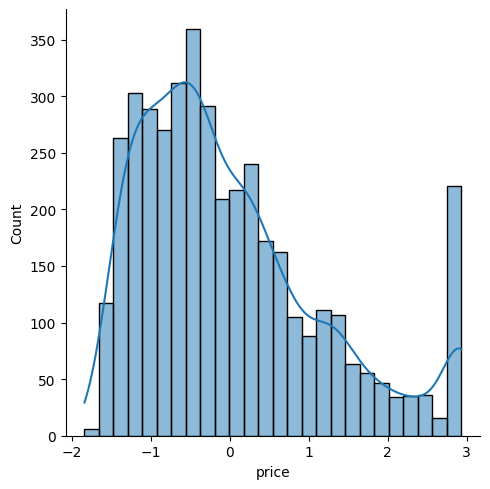

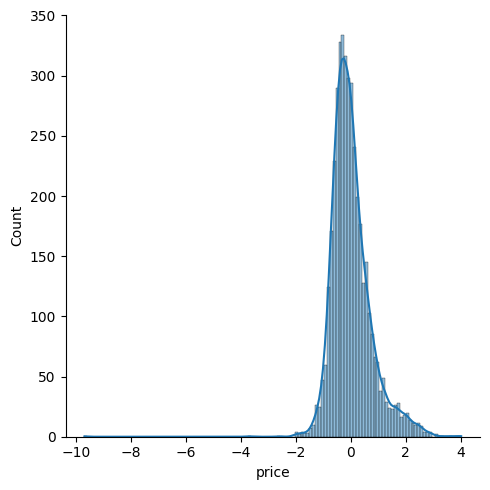

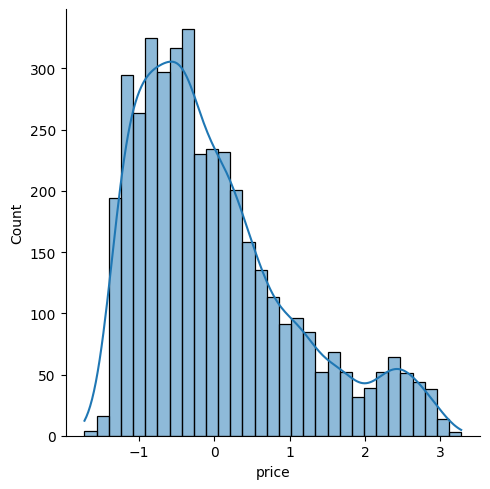

In [65]:
# Normality -> Distribution plot of the above residuals == it should be normally distributed

sns.displot(regression_residuals , kde=True)

sns.displot(lasso_residuals , kde=True)

sns.displot(ridge_residuals , kde=True)

sns.displot(elastic_net_residuals , kde=True)


In [73]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

print("Normal Regression")
print("MSE: ",mean_squared_error(y_test,y_cap))
print("Squred MSE: ",np.sqrt(mean_squared_error(y_test,y_cap)))
print("MAE: ",mean_absolute_error(y_test,y_cap))
print("R2 Score: ",r2_score(y_test,y_cap))
print()

print("Lasso Regression")
print("MSE: ",mean_squared_error(y_test,y_cap_lasso))
print("Squred MSE: ",np.sqrt(mean_squared_error(y_test,y_cap_lasso)))
print("MAE: ",mean_absolute_error(y_test,y_cap_lasso))
print("R2 Score: ",r2_score(y_test,y_cap_lasso))
print()

print("Ridge Regression")
print("MSE: ",mean_squared_error(y_test,y_cap_ridge))
print("Squred MSE: ",np.sqrt(mean_squared_error(y_test,y_cap_ridge)))
print("MAE: ",mean_absolute_error(y_test,y_cap_ridge))
print("R2 Score: ",r2_score(y_test,y_cap_ridge))
print()

print("Elastic Net Regression")
print("MSE: ",mean_squared_error(y_test,y_cap_elastic_net))
print("Squred MSE: ",np.sqrt(mean_squared_error(y_test,y_cap_elastic_net)))
print("MAE: ",mean_absolute_error(y_test,y_cap_elastic_net))
print("R2 Score: ",r2_score(y_test,y_cap_elastic_net))
print()



Normal Regression
MSE:  0.5347838950335045
Squred MSE:  0.7312892006815802
MAE:  0.5278504031670417
R2 Score:  0.6084415600235558

Lasso Regression
MSE:  1.3657988826860425
Squred MSE:  1.1686739847733596
MAE:  0.9288342032391992
R2 Score:  -1.156503153976196e-05

Ridge Regression
MSE:  0.5347633787931912
Squred MSE:  0.7312751731005172
MAE:  0.5278502348030356
R2 Score:  0.608456581618495

Elastic Net Regression
MSE:  1.0921710836648864
Squred MSE:  1.0450698941529635
MAE:  0.8276574876887405
R2 Score:  0.20033342499887163

